In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor # converts PIL image or numpy array into tensors

import matplotlib.pyplot as plt
import numpy

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(torch.__version__)
print(device)

2.4.0
cpu


# Computer Vision Pictionary

------------------
# Data Processing and Handling
1000 images per class,

In [2]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import os
from pathlib import Path

In [3]:
data_path = '../data/'

def walk_through_dir(dir_path):
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f'There are {len(dirnames)} directories and {len(filenames)} images in \'{dirpath}\'.')

walk_through_dir(data_path)

There are 2 directories and 1 images in '../data/'.
There are 10 directories and 0 images in '../data/test'.
There are 0 directories and 62 images in '../data/test/gray'.
There are 0 directories and 59 images in '../data/test/creativity'.
There are 0 directories and 72 images in '../data/test/fairness'.
There are 0 directories and 135 images in '../data/test/null'.
There are 0 directories and 40 images in '../data/test/happiness'.
There are 0 directories and 67 images in '../data/test/kindness'.
There are 0 directories and 269 images in '../data/test/growing'.
There are 0 directories and 45 images in '../data/test/expression'.
There are 0 directories and 192 images in '../data/test/reality'.
There are 0 directories and 49 images in '../data/test/dread'.
There are 10 directories and 1 images in '../data/train'.
There are 0 directories and 279 images in '../data/train/gray'.
There are 0 directories and 260 images in '../data/train/creativity'.
There are 0 directories and 313 images in '.

../data [PosixPath('../data/test/gray/5684.jpg'), PosixPath('../data/test/gray/3633.jpg'), PosixPath('../data/test/gray/5493.jpg'), PosixPath('../data/test/gray/5685.jpg'), PosixPath('../data/test/gray/5652.jpg'), PosixPath('../data/test/gray/4572.jpg'), PosixPath('../data/test/gray/5446.jpg'), PosixPath('../data/test/gray/1754.jpg'), PosixPath('../data/test/gray/4348.jpg'), PosixPath('../data/test/gray/1595.jpg'), PosixPath('../data/test/gray/4375.jpg'), PosixPath('../data/test/gray/5453.jpg'), PosixPath('../data/test/gray/5651.jpg'), PosixPath('../data/test/gray/5123.jpg'), PosixPath('../data/test/gray/4573.jpg'), PosixPath('../data/test/gray/5679.jpg'), PosixPath('../data/test/gray/5682.jpg'), PosixPath('../data/test/gray/5480.jpg'), PosixPath('../data/test/gray/5537.jpg'), PosixPath('../data/test/gray/5536.jpg'), PosixPath('../data/test/gray/5668.jpg'), PosixPath('../data/test/gray/5643.jpg'), PosixPath('../data/test/gray/5546.jpg'), PosixPath('../data/test/gray/4671.jpg'), PosixPa

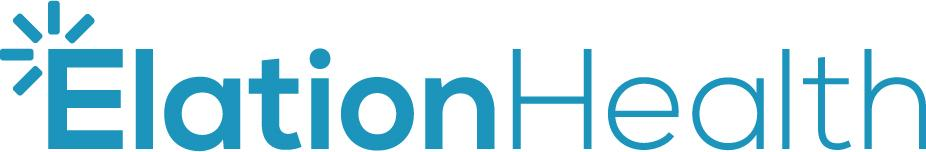

In [4]:
import random
from PIL import Image

image_path = Path(data_path)
image_path_list = list(image_path.glob('*/*/*.[jJ][pP][gG]'))
print(image_path, image_path_list)

random_image_path = random.choice(image_path_list)

image_class = random_image_path.parent.stem # isolates what type of food it is

img = Image.open(random_image_path)

print(f'Random Image Path: {random_image_path}')
print(f'Image Class: {image_class}')
print(f'Image height: {img.height}')
print(f'Image Width: {img.width}')
img

Text(0.5, 1.0, 'Image Class: happiness | Image Shape: (152, 926, 3) -> [height, width, color_channels]')

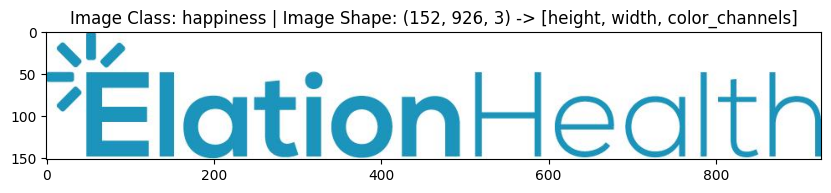

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# turn image into array
img_as_array = np.asarray(img)
# plot image with matplotlib
plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f'Image Class: {image_class} | Image Shape: {img_as_array.shape} -> [height, width, color_channels]')

In [6]:
img_as_array # show image in numerical format.

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [210, 255, 255],
        [214, 255, 255],
        [216, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [225, 255, 255],
        [229, 255, 255],
        [230, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [234, 255, 255],
        [238, 255, 255],
        [240, 255, 255]]

In [7]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# using torchvision.transforms
# we start with jpeg images of varying sizes

data_transform = transforms.Compose([transforms.Resize(size=(64, 64)), # resize 
                                     transforms.RandomHorizontalFlip(p=0.5), # randomly flips an image horizontally
                                     transforms.ToTensor()]) # transforms to tensor
data_transform(img)

tensor([[[1.0000, 1.0000, 1.0000,  ..., 0.9922, 0.9961, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 0.9882, 0.9922, 0.9961],
         [1.0000, 1.0000, 1.0000,  ..., 0.9843, 0.9922, 0.9961],
         ...,
         [0.6314, 0.9961, 1.0000,  ..., 0.9882, 1.0000, 1.0000],
         [0.7451, 1.0000, 1.0000,  ..., 0.9922, 1.0000, 1.0000],
         [0.9529, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],

        [[1.0000, 1.0000, 1.0000,  ..., 0.9961, 0.9922, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 0.9922, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 0.9922, 1.0000, 1.0000],
         ...,
         [0.8196, 1.0000, 1.0000,  ..., 0.9961, 1.0000, 1.0000],
         [0.8627, 1.0000, 1.0000,  ..., 0.9961, 1.0000, 1.0000],
         [0.9922, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],

        [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 0.9961, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 0.9961, 1.0000, 1.

[PosixPath('../data/test/gray/5684.jpg'), PosixPath('../data/test/gray/3633.jpg'), PosixPath('../data/test/gray/5493.jpg'), PosixPath('../data/test/gray/5685.jpg'), PosixPath('../data/test/gray/5652.jpg'), PosixPath('../data/test/gray/4572.jpg'), PosixPath('../data/test/gray/5446.jpg'), PosixPath('../data/test/gray/1754.jpg'), PosixPath('../data/test/gray/4348.jpg'), PosixPath('../data/test/gray/1595.jpg'), PosixPath('../data/test/gray/4375.jpg'), PosixPath('../data/test/gray/5453.jpg'), PosixPath('../data/test/gray/5651.jpg'), PosixPath('../data/test/gray/5123.jpg'), PosixPath('../data/test/gray/4573.jpg'), PosixPath('../data/test/gray/5679.jpg'), PosixPath('../data/test/gray/5682.jpg'), PosixPath('../data/test/gray/5480.jpg'), PosixPath('../data/test/gray/5537.jpg'), PosixPath('../data/test/gray/5536.jpg'), PosixPath('../data/test/gray/5668.jpg'), PosixPath('../data/test/gray/5643.jpg'), PosixPath('../data/test/gray/5546.jpg'), PosixPath('../data/test/gray/4671.jpg'), PosixPath('../d

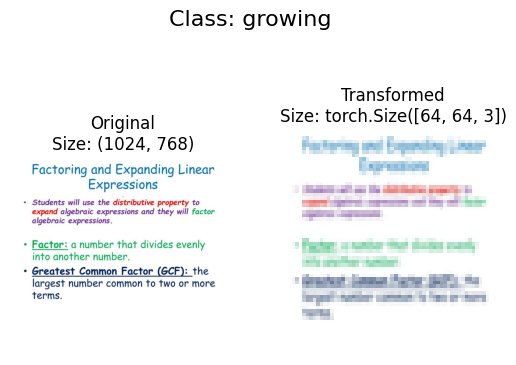

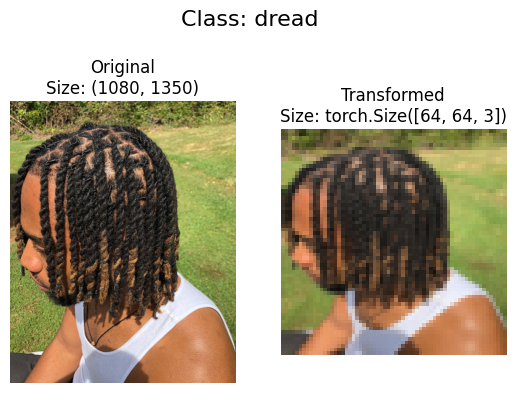

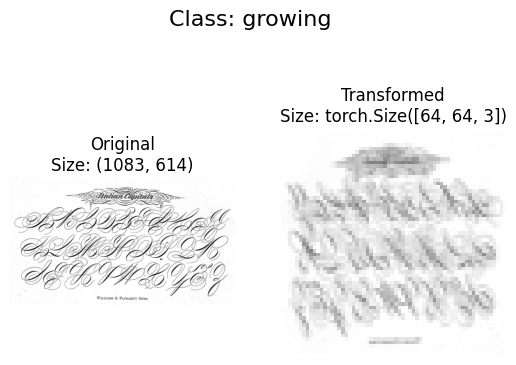

In [8]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
  """
  selects random images from a path of images, and loads/transforms them and plots the original vs transformed version
  """
  if seed:
    random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f'Original\nSize: {f.size}')
      ax[0].axis(False)

      transformed_image = transform(f).permute(1, 2, 0)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f'Transformed\nSize: {transformed_image.shape}')
      ax[1].axis('off')

      fig.suptitle(f'Class: {image_path.parent.stem}', fontsize=16)

print(image_path_list)
plot_transformed_images(image_paths=image_path_list,
                        transform=data_transform,
                        n=3,
                        seed=None)

___________________
# The Dataset

In [9]:
train_dir = image_path / 'train'
test_dir = image_path / 'test'

train_dir, test_dir # this is a pretty standard setup for training and testing computer vision problems
# this also mimics the dataset of how torchvision organizes its data

(PosixPath('../data/train'), PosixPath('../data/test'))

In [10]:
# loading image classification data using 'torchvision.datasets.ImageFolder'

from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,
                                  target_transform=None) #transform for a class/label
test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)
train_data, test_data # these are now dataset objects

(Dataset ImageFolder
     Number of datapoints: 4625
     Root location: ../data/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 988
     Root location: ../data/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [11]:
class_names = train_data.classes
class_dict = train_data.class_to_idx
class_names, class_dict

(['creativity',
  'dread',
  'expression',
  'fairness',
  'gray',
  'growing',
  'happiness',
  'kindness',
  'null',
  'reality'],
 {'creativity': 0,
  'dread': 1,
  'expression': 2,
  'fairness': 3,
  'gray': 4,
  'growing': 5,
  'happiness': 6,
  'kindness': 7,
  'null': 8,
  'reality': 9})

In [12]:
len(train_data), len(test_data)

(4625, 988)

In [13]:
#index on the train_data to get a single image and label
img, label = train_data[0][0], class_names[train_data[0][1]]
print(f'Image Tensor: \n {img}')
print(f'Image Shape: {img.shape}')
print(f'Image Datatype: {img.dtype}')
print(f'Image Lable: {label}')
print(f'Label Datatype: {type(label)}')

Image Tensor: 
 tensor([[[1.0000, 0.9961, 0.9843,  ..., 0.9882, 0.9882, 0.9882],
         [0.9882, 0.8863, 0.8392,  ..., 0.8941, 0.9059, 0.9608],
         [0.9608, 0.4980, 0.2667,  ..., 0.5412, 0.6196, 0.9176],
         ...,
         [0.9725, 0.6588, 0.5255,  ..., 0.6431, 0.6941, 0.9373],
         [0.9804, 0.8549, 0.7961,  ..., 0.8549, 0.8745, 0.9569],
         [0.9922, 0.9725, 0.9647,  ..., 0.9843, 0.9804, 0.9843]],

        [[0.9961, 0.9804, 0.9882,  ..., 0.9961, 0.9843, 0.9882],
         [0.9922, 0.9059, 0.8824,  ..., 0.9294, 0.9255, 0.9725],
         [0.9804, 0.5529, 0.3608,  ..., 0.6118, 0.6706, 0.9451],
         ...,
         [0.9843, 0.7255, 0.6078,  ..., 0.7020, 0.7373, 0.9529],
         [0.9922, 0.8863, 0.8392,  ..., 0.8784, 0.8902, 0.9765],
         [1.0000, 0.9882, 0.9882,  ..., 0.9961, 0.9882, 0.9882]],

        [[0.9765, 0.9804, 0.9490,  ..., 0.9686, 0.9882, 0.9647],
         [0.9843, 0.9412, 0.9137,  ..., 0.9490, 0.9569, 0.9647],
         [0.9765, 0.6706, 0.5647,  ..., 0.

Original shape: torch.Size([3, 64, 64]) -> [color_channel, height, width]
Image Permute: torch.Size([64, 64, 3]) -> [height, width, color_channels]


Text(0.5, 1.0, 'creativity')

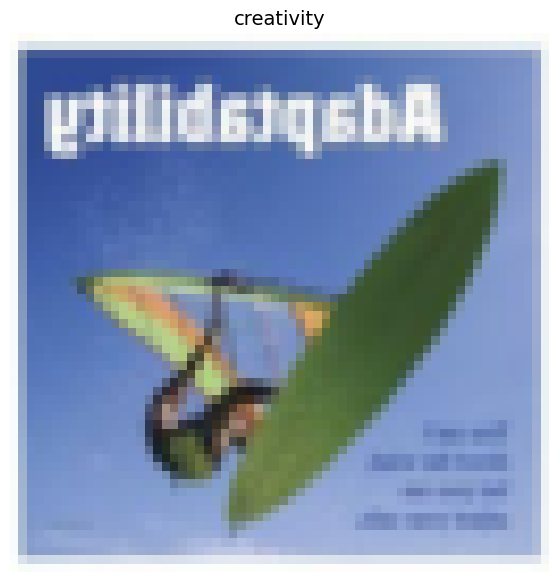

In [14]:
img_permute = img.permute(1, 2, 0)
print(f'Original shape: {img.shape} -> [color_channel, height, width]')
print(f'Image Permute: {img_permute.shape} -> [height, width, color_channels]')

plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.axis(False)
plt.title(label, fontsize=14)

In [15]:
# turn train and test data into dataloaders

from torch.utils.data import DataLoader
import os

batch_size = 1
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=batch_size,
                              num_workers=os.cpu_count(), #how many cores it runs on
                              shuffle=True # so we don't train batterns
                              )
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=batch_size,
                             num_workers=os.cpu_count(),
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x168e25710>,
 <torch.utils.data.dataloader.DataLoader at 0x168ae0550>)

In [16]:
img, label = next(iter(train_dataloader))
print(f'Image Shape: {img.shape} -> [batch_size, color_channels, height width]')
print(f'Label Shape: {label.shape}')

Image Shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height width]
Label Shape: torch.Size([1])


In [17]:
import os
import pathlib
import torch
from PIL import Image #image objects from PIL
from torch.utils.data import Dataset # abstract class representing dataset

from torchvision import transforms
from typing import Tuple, Dict, List # for type hinting

In [18]:
target_directory = train_dir
print(f'Target dir: {target_directory}')

def find_classes(directory:str) -> Tuple[List[str], Dict[str, int]]:
  '''
  finds the class folder names in a target directory
  '''
  # return list
  classes = sorted(entry.name for entry in list(os.scandir(target_directory)) if entry.is_dir())
  if not classes:
    raise FileNotFoundError(f'Couldn\'t find any classes in {directory}. Check File Structure')

  # create dictionary of index labels
  class_to_idx = {class_name: i for i, class_name in enumerate(classes)}

  return classes, class_to_idx

find_classes(target_directory)

Target dir: ../data/train


(['creativity',
  'dread',
  'expression',
  'fairness',
  'gray',
  'growing',
  'happiness',
  'kindness',
  'null',
  'reality'],
 {'creativity': 0,
  'dread': 1,
  'expression': 2,
  'fairness': 3,
  'gray': 4,
  'growing': 5,
  'happiness': 6,
  'kindness': 7,
  'null': 8,
  'reality': 9})

In [19]:
class ImageFolderCustom(Dataset):
  def __init__(self,
               targ_dir: str,
               transform=None,):
    self.paths = list(pathlib.Path(targ_dir).glob('*/*.jpg'))
    self.transform = transform

    self.classes, self.class_to_idx = find_classes(targ_dir)

  def load_image(self, index: int) -> Image.Image:
    '''
    Opens an image via a path and returns it
    '''
    image_path = self.paths[index]
    return Image.open(image_path)

  def __len__(self) -> int:
    '''
    returns how many samples there are in the dataset
    '''
    return len(self.paths)

  def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
    '''
    overwrite getitem method to return a particular sample
    '''
    img = self.load_image(index)
    class_name = self.paths[index].parent.name #expects path in format: data_folder/name/img
    class_idx = self.class_to_idx[class_name]

    # transform if necessary

    if self.transform:
      return self.transform(img), class_idx
    else:
      return img, class_idx

In [20]:
train_transform = transforms.Compose([transforms.Resize(size=(64, 64)),
                                       transforms.RandomHorizontalFlip(p=0.5),
                                       transforms.ToTensor()])

test_transform = transforms.Compose([transforms.Resize(size=(64,64)),
                                    transforms.ToTensor()])

train_data_custom = ImageFolderCustom(targ_dir=train_dir,
                                      transform=train_transform)
test_data_custom = ImageFolderCustom(targ_dir=test_dir,
                                     transform=test_transform)

train_data, test_data,

(Dataset ImageFolder
     Number of datapoints: 4625
     Root location: ../data/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 988
     Root location: ../data/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [21]:
print(train_data_custom.class_to_idx == train_data.class_to_idx)
print(test_data_custom.class_to_idx == test_data.class_to_idx) # custom ones are the same as built-in ones

True
True


In [22]:
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
  if n > 10:
    n = 10
    display_shape = False
    print(f'For display, n shouldn\'t be larger than 10.')

  if seed:
    random.seed(seed)

  random_samples_idx = random.sample(range(len(dataset)), k=n)

  plt.figure(figsize=(16,8))

  for i, targ_sample in enumerate(random_samples_idx):
    targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1] # image, label
    targ_image_adjust = targ_image.permute(1, 2, 0) # [cc, h, w ] -> [h, w, cc]

    plt.subplot(1, n, i+1)
    plt.imshow(targ_image_adjust)
    plt.axis(False)
    if classes:
      title = f'Class: {classes[targ_label]}'
      if display_shape:
        title = title + f'\nshape: {targ_image_adjust.shape}'
    plt.title(title)

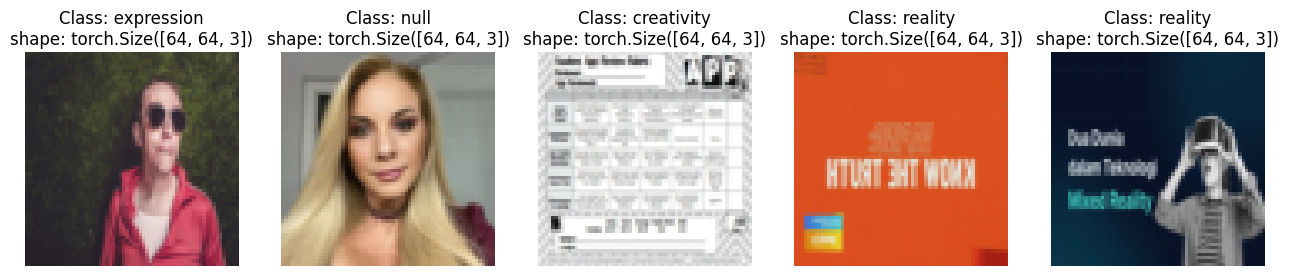

In [23]:
display_random_images(train_data,
                     n=5,
                     classes=class_names,
                     seed=None)

--------------
# The Dataloader

In [24]:
from torch.utils.data import DataLoader

batch_size = 32 # good batch sizes are multiples of 8, to help with computing

train_dataloader_custom = DataLoader(dataset=train_data_custom,
                                     batch_size=batch_size,
                                     num_workers=os.cpu_count(),
                                     shuffle=True)
test_dataloader_custom = DataLoader(dataset=test_data_custom,
                                     batch_size=batch_size,
                                     num_workers=os.cpu_count(),
                                     shuffle=True)

train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x1690fb950>,
 <torch.utils.data.dataloader.DataLoader at 0x168c39550>)

In [25]:
# get image and label from custom dataloader
img_custom, label_custom = next(iter(train_dataloader_custom))

img_custom.shape, label_custom.shape

Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/spawn.py", line 120, in spawn_main
    exitcode = _main(fd, parent_sentinel)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/spawn.py", line 130, in _main
    self = reduction.pickle.load(from_parent)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: Can't get attribute 'ImageFolderCustom' on <module '__main__' (built-in)>
Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/spawn.py", line 120, in spawn_main
    exitcode = _main(fd, parent_sentinel)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/spawn.py", line 130, in _main
    self = r

RuntimeError: DataLoader worker (pid(s) 70384) exited unexpectedly

________________
# Transformations

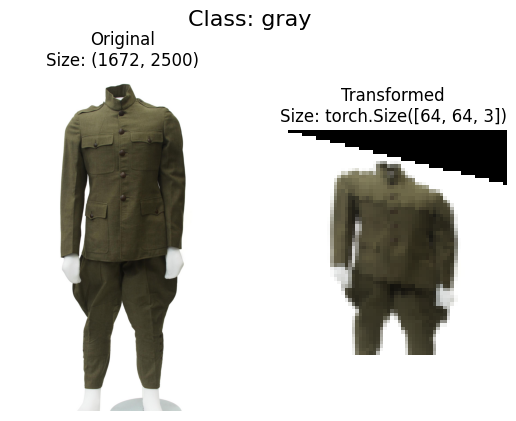

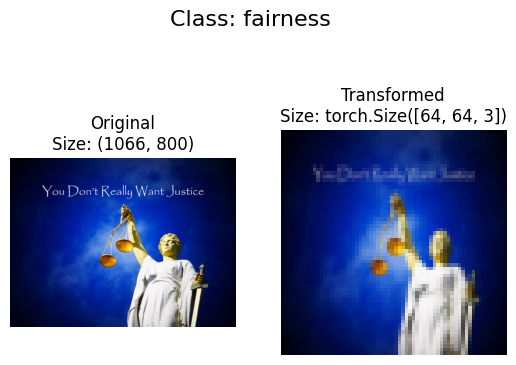

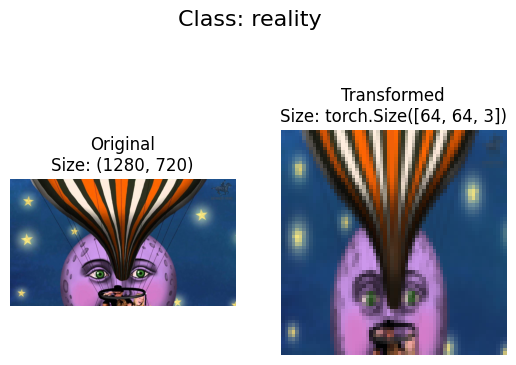

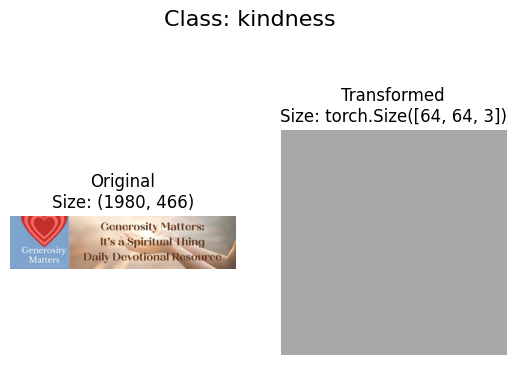

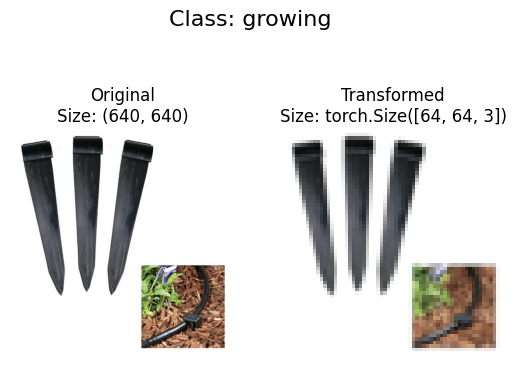

In [26]:
from torchvision import transforms

train_transforms = transforms.Compose([transforms.Resize(size=(64, 64)),
                                       transforms.TrivialAugmentWide(num_magnitude_bins=5), # this is the magnitude of the transformations
                                       transforms.ToTensor()])

test_transforms = transforms.Compose([transforms.Resize(size=(64, 64)),
                                     transforms.ToTensor()])

image_path_list = list(image_path.glob('*/*/*.jpg'))
plot_transformed_images(image_paths=image_path_list,
                       transform=train_transforms,
                       n=5,
                       seed=None)

In [27]:
from torchvision import transforms
train_transform_trivial = transforms.Compose([transforms.Resize(size=(64,64)),
                                             transforms.TrivialAugmentWide(num_magnitude_bins=31),
                                             transforms.ToTensor()])
test_transform_simple = transforms.Compose([transforms.Resize(size=(64,64)),
                                           transforms.ToTensor()])

train_data_augmented = datasets.ImageFolder(root=train_dir,
                                            transform=train_transform_trivial)
test_data_simple = datasets.ImageFolder(root=test_dir,
                                        transform=test_transform_simple)

____________
# TinyVGG 

This is the model based off of the tinyvgg architecture

In [28]:
class TinyVGG(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
      super().__init__()
      self.conv_block_1 = nn.Sequential(
          nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
          nn.ReLU(),
          nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2, stride=2)  # Reduces spatial dimensions
      )
      self.conv_block_2 = nn.Sequential(
          nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
          nn.ReLU(),
          nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2, stride=2)  # Further reduces spatial dimensions
      )
      
      # Use a dummy input to calculate the output size
      dummy_input = torch.randn(1, input_shape, 64, 64)  # Adjust 64x64 to your input image size
      with torch.no_grad():
          output = self.conv_block_1(dummy_input)
          output = self.conv_block_2(output)
          flattened_output_size = output.view(-1).shape[0]

      self.classifier = nn.Sequential(
          nn.Flatten(),
          nn.Linear(in_features=flattened_output_size, out_features=output_shape)
      )

  def forward(self, x):
      x = self.conv_block_1(x)
    #   print(x.shape)
      x = self.conv_block_2(x)
    #   print(x.shape)
      x = self.classifier(x)
    #   print(x.shape)
      return x

____________________
# Model Instantiation for Testing and Training

In [29]:
import os
batch_size = 32
num_workers = os.cpu_count()
print(f'Number of Workers: {num_workers}')

torch.manual_seed(42)
torch.cuda.manual_seed(42)

train_dataloader_augmented = DataLoader(dataset=train_data_augmented,
                                        batch_size=batch_size,
                                        num_workers=num_workers,
                                        shuffle=True)
test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                    batch_size=batch_size,
                                    shuffle=False,
                                    num_workers=num_workers)

Number of Workers: 8


In [30]:
# model_0 = TinyVGG(input_shape=3, hidden_units=64, output_shape=10)
model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)

model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=10, bias=True)
  )
)

In [31]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device=device):
 # put model in train mode
  model.train()
 # set up train loss and train accuracy averaged per batch
  train_loss, train_acc = 0,0
 #loop through dataloader
  for batch, (X,y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)
    #forward pass
    y_pred = model(X)

    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

    # optimizer zero grad
    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1)) # can just take argmax, don't need softmax

    train_acc += (y_pred_class==y).sum().item()/len(y_pred) # total number correct divided by samples

# adjust metrics to get average loss and acc per batch
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)

  return train_loss, train_acc

In [32]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device=device):
  model.eval()

  test_preds = []
  test_loss, test_acc = 0,0

  with torch.inference_mode():
    for batch, (X,y) in enumerate(dataloader):
      X, y = X.to(device), y.to(device)
      test_pred_logits = model(X)

      test_pred = torch.softmax(test_pred_logits, dim=1).argmax(dim=1) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 32, so can perform on dim=1)
      # Put predictions on CPU for evaluation
      test_preds.append(test_pred.cpu())
      # calc loss
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()

      #calc acc
      test_pred_labels = test_pred_logits.argmax(dim=1) # don't need to take softmax, just take argmax.
      test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
  test_pred_tensor = torch.cat(test_preds)
  return test_loss, test_acc, test_pred_tensor
  # Concatenate list of predictions into a tensor
  
    

In [33]:
from tqdm import tqdm

# create a looping function

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int=5,
          device=device):
  # create empty results dict
  results = {'train_loss' : [],
             'train_acc' : [],
             'test_loss' : [],
             'test_acc' : []}
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer,
                                       device=device)
    test_loss, test_acc, test_pred_tensor = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn,
                                    device=device)

    print(f'Epoch: {epoch} | Train Loss: {train_loss:.4f} | Train Acc {train_acc:.4f} | Test Loss: {test_loss:.4f}, | Test Acc: {test_acc:.4f}')

    results['train_loss'].append(train_loss)
    results['train_acc'].append(train_acc)
    results['test_loss'].append(test_loss)
    results['test_acc'].append(test_acc)

  return results, test_pred_tensor

In [34]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.001)

num_epochs = 30

from timeit import default_timer as timer
start_time = timer()

model_0_results, test_pred_tensor = train(model=model_0,
      train_dataloader=train_dataloader_augmented,
      test_dataloader=test_dataloader_simple,
      optimizer=optimizer,
      loss_fn=loss_fn,
      epochs=num_epochs,
      device=device)

end_time = timer()

torch.save({
    'model_state_dict': model_0.state_dict(),
    'class_names': class_names
}, 'trained_models/model_0.pth')

print(f'Total Training Time: {end_time - start_time:.4f} seconds')

  3%|▎         | 1/30 [01:53<54:37, 113.03s/it]

Epoch: 0 | Train Loss: 2.0443 | Train Acc 0.0080 | Test Loss: 2.0893, | Test Acc: 0.2712


  7%|▋         | 2/30 [03:42<51:50, 111.07s/it]

Epoch: 1 | Train Loss: 2.0208 | Train Acc 0.0069 | Test Loss: 2.0444, | Test Acc: 0.2692


 10%|█         | 3/30 [05:31<49:28, 109.94s/it]

Epoch: 2 | Train Loss: 2.0074 | Train Acc 0.0114 | Test Loss: 2.0388, | Test Acc: 0.2732


 13%|█▎        | 4/30 [07:21<47:39, 109.98s/it]

Epoch: 3 | Train Loss: 1.9942 | Train Acc 0.0183 | Test Loss: 2.0186, | Test Acc: 0.2915


 17%|█▋        | 5/30 [09:11<45:48, 109.92s/it]

Epoch: 4 | Train Loss: 1.9862 | Train Acc 0.0039 | Test Loss: 1.9990, | Test Acc: 0.3039


 20%|██        | 6/30 [11:01<44:02, 110.10s/it]

Epoch: 5 | Train Loss: 1.9806 | Train Acc 0.0099 | Test Loss: 1.9982, | Test Acc: 0.3050


 23%|██▎       | 7/30 [12:52<42:14, 110.19s/it]

Epoch: 6 | Train Loss: 1.9696 | Train Acc 0.0019 | Test Loss: 2.0141, | Test Acc: 0.2968


 27%|██▋       | 8/30 [14:43<40:29, 110.45s/it]

Epoch: 7 | Train Loss: 1.9651 | Train Acc 0.0149 | Test Loss: 1.9973, | Test Acc: 0.2926


 30%|███       | 9/30 [16:33<38:39, 110.44s/it]

Epoch: 8 | Train Loss: 1.9587 | Train Acc 0.0045 | Test Loss: 1.9907, | Test Acc: 0.3066


 33%|███▎      | 10/30 [18:23<36:48, 110.41s/it]

Epoch: 9 | Train Loss: 1.9610 | Train Acc 0.0084 | Test Loss: 1.9850, | Test Acc: 0.3099


 37%|███▋      | 11/30 [20:14<34:59, 110.47s/it]

Epoch: 10 | Train Loss: 1.9593 | Train Acc 0.0136 | Test Loss: 1.9868, | Test Acc: 0.2958


 40%|████      | 12/30 [22:05<33:14, 110.78s/it]

Epoch: 11 | Train Loss: 1.9511 | Train Acc 0.0093 | Test Loss: 1.9861, | Test Acc: 0.3008


 43%|████▎     | 13/30 [23:56<31:24, 110.87s/it]

Epoch: 12 | Train Loss: 1.9492 | Train Acc 0.0116 | Test Loss: 2.0139, | Test Acc: 0.2895


 47%|████▋     | 14/30 [25:48<29:36, 111.02s/it]

Epoch: 13 | Train Loss: 1.9456 | Train Acc 0.0151 | Test Loss: 1.9786, | Test Acc: 0.3160


 50%|█████     | 15/30 [27:39<27:43, 110.93s/it]

Epoch: 14 | Train Loss: 1.9443 | Train Acc 0.0108 | Test Loss: 2.0027, | Test Acc: 0.3039


 53%|█████▎    | 16/30 [29:31<25:58, 111.33s/it]

Epoch: 15 | Train Loss: 1.9441 | Train Acc 0.0091 | Test Loss: 1.9834, | Test Acc: 0.3187


 57%|█████▋    | 17/30 [31:21<24:04, 111.12s/it]

Epoch: 16 | Train Loss: 1.9288 | Train Acc 0.0101 | Test Loss: 1.9902, | Test Acc: 0.3057


 60%|██████    | 18/30 [33:13<22:16, 111.34s/it]

Epoch: 17 | Train Loss: 1.9416 | Train Acc 0.0013 | Test Loss: 1.9787, | Test Acc: 0.3085


 63%|██████▎   | 19/30 [35:04<20:22, 111.12s/it]

Epoch: 18 | Train Loss: 1.9214 | Train Acc 0.0125 | Test Loss: 1.9892, | Test Acc: 0.3207


 67%|██████▋   | 20/30 [36:56<18:35, 111.52s/it]

Epoch: 19 | Train Loss: 1.9186 | Train Acc 0.0155 | Test Loss: 2.0014, | Test Acc: 0.3200


 70%|███████   | 21/30 [38:49<16:47, 111.96s/it]

Epoch: 20 | Train Loss: 1.9110 | Train Acc 0.0129 | Test Loss: 1.9986, | Test Acc: 0.3073


 73%|███████▎  | 22/30 [40:40<14:51, 111.45s/it]

Epoch: 21 | Train Loss: 1.9097 | Train Acc 0.0052 | Test Loss: 2.0035, | Test Acc: 0.3233


 77%|███████▋  | 23/30 [42:30<12:58, 111.23s/it]

Epoch: 22 | Train Loss: 1.9039 | Train Acc 0.0091 | Test Loss: 1.9879, | Test Acc: 0.3364


 80%|████████  | 24/30 [44:21<11:06, 111.06s/it]

Epoch: 23 | Train Loss: 1.8938 | Train Acc 0.0103 | Test Loss: 2.0017, | Test Acc: 0.3291


 83%|████████▎ | 25/30 [46:12<09:14, 110.97s/it]

Epoch: 24 | Train Loss: 1.8915 | Train Acc 0.0131 | Test Loss: 1.9935, | Test Acc: 0.3217


 87%|████████▋ | 26/30 [48:02<07:23, 110.84s/it]

Epoch: 25 | Train Loss: 1.8800 | Train Acc 0.0069 | Test Loss: 1.9960, | Test Acc: 0.3183


 90%|█████████ | 27/30 [49:53<05:32, 110.75s/it]

Epoch: 26 | Train Loss: 1.8767 | Train Acc 0.0131 | Test Loss: 1.9853, | Test Acc: 0.3240


 93%|█████████▎| 28/30 [51:43<03:41, 110.73s/it]

Epoch: 27 | Train Loss: 1.8809 | Train Acc 0.0009 | Test Loss: 2.0106, | Test Acc: 0.2987


 97%|█████████▋| 29/30 [53:34<01:50, 110.75s/it]

Epoch: 28 | Train Loss: 1.8709 | Train Acc 0.0034 | Test Loss: 2.0054, | Test Acc: 0.3308


100%|██████████| 30/30 [55:25<00:00, 110.85s/it]

Epoch: 29 | Train Loss: 1.8688 | Train Acc 0.0056 | Test Loss: 2.0069, | Test Acc: 0.3229
Total Training Time: 3325.5839 seconds


____________
# View Training Results

In [35]:
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [36]:
def plot_loss_curve(results: Dict[str, List[float]]):
  '''
  plots the training curve in the results dictionary
  '''
  # get the loss values of the results dict(training and test)
  loss = results['train_loss']
  test_loss = results['test_loss']

  accuracy = results['train_acc']
  test_accuracy = results['test_acc']

  epochs = range(len(results['train_loss']))

  plt.figure(figsize=(15,7))
  plt.subplot(1,2,1)
  plt.plot(epochs, loss, label='train_loss')
  plt.plot(epochs, test_loss, label='test_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  plt.subplot(1,2,2)
  plt.plot(epochs, accuracy, label='train_acc')
  plt.plot(epochs, test_accuracy, label='test_acc')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

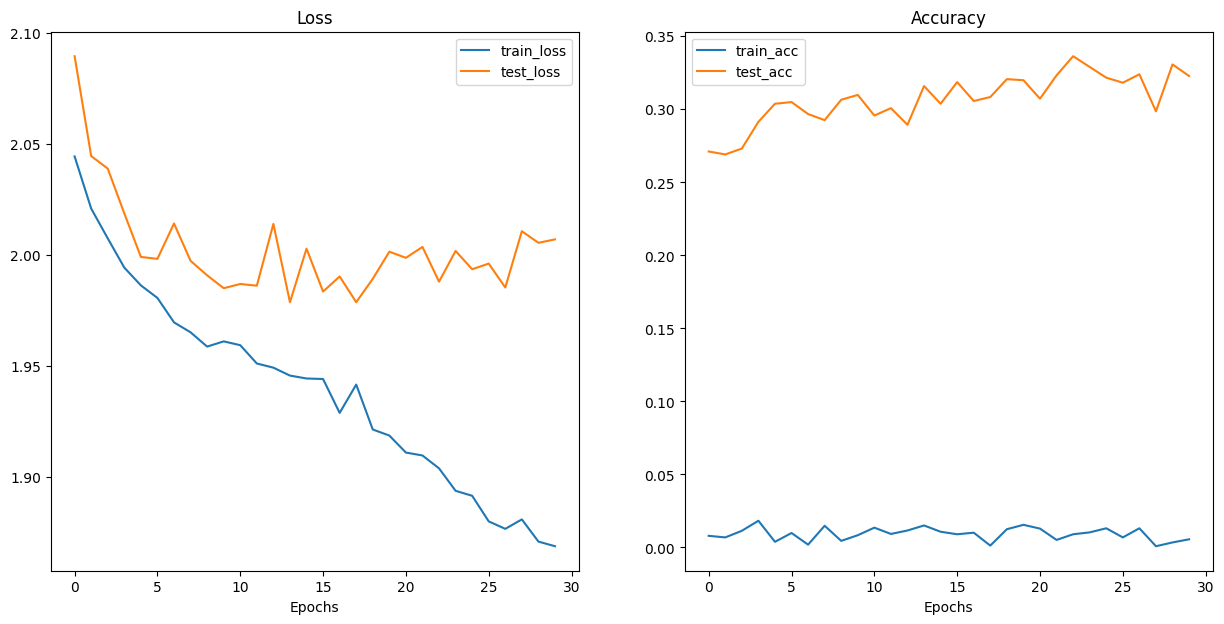

In [37]:
plot_loss_curve(model_0_results)

_____________

# Model_1

Athough the loss from the last model seemed to decrease, the accuracy didn't really increase. 

Model 1 will 
* train for longer
* include more hidden units
* increase the learning rate

In [40]:
model_1 = TinyVGG(input_shape=3,
                  hidden_units=20,
                  output_shape=len(class_names)).to(device)

model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=5120, out_features=10, bias=True)
  )
)

In [41]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(),
                             lr=0.01)

num_epochs = 40

from timeit import default_timer as timer
start_time = timer()

model_1_results, test_pred_tensor = train(model=model_1,
      train_dataloader=train_dataloader_augmented,
      test_dataloader=test_dataloader_simple,
      optimizer=optimizer,
      loss_fn=loss_fn,
      epochs=num_epochs,
      device=device)

end_time = timer()

torch.save({
    'model_state_dict': model_1.state_dict(),
    'class_names': class_names
}, 'trained_models/model_1.pth')

print(f'Total Training Time: {end_time - start_time:.4f} seconds')

  2%|▎         | 1/40 [01:57<1:16:06, 117.09s/it]

Epoch: 0 | Train Loss: 2.0897 | Train Acc 0.2763 | Test Loss: 2.0957, | Test Acc: 0.2712


  5%|▌         | 2/40 [03:55<1:14:33, 117.73s/it]

Epoch: 1 | Train Loss: 2.0415 | Train Acc 0.3169 | Test Loss: 2.0774, | Test Acc: 0.2712


  8%|▊         | 3/40 [05:53<1:12:44, 117.97s/it]

Epoch: 2 | Train Loss: 2.0457 | Train Acc 0.3173 | Test Loss: 2.0813, | Test Acc: 0.2712


 10%|█         | 4/40 [07:52<1:11:08, 118.56s/it]

Epoch: 3 | Train Loss: 2.0399 | Train Acc 0.3167 | Test Loss: 2.0857, | Test Acc: 0.2712


 12%|█▎        | 5/40 [09:50<1:08:58, 118.24s/it]

Epoch: 4 | Train Loss: 2.0447 | Train Acc 0.3167 | Test Loss: 2.1084, | Test Acc: 0.2712


 15%|█▌        | 6/40 [11:45<1:06:21, 117.11s/it]

Epoch: 5 | Train Loss: 2.0452 | Train Acc 0.3163 | Test Loss: 2.1066, | Test Acc: 0.2712


 18%|█▊        | 7/40 [13:42<1:04:27, 117.19s/it]

Epoch: 6 | Train Loss: 2.0398 | Train Acc 0.3165 | Test Loss: 2.0903, | Test Acc: 0.2712


 20%|██        | 8/40 [15:40<1:02:33, 117.31s/it]

Epoch: 7 | Train Loss: 2.0353 | Train Acc 0.3165 | Test Loss: 2.0785, | Test Acc: 0.2712


In [ ]:
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=test_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy 
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
);